# DirectLiNGAM by Kernel Method

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.16.2', '0.24.2', '0.11.1', '1.3']


## Test data
We create test data consisting of 6 variables.

In [2]:
n = 1000
e = lambda n: np.random.laplace(0, 1, n)
x3 = e(n)
x2 = 0.3*x3 + e(n)
x1 = 0.3*x3 + 0.3*x2 + e(n)
x0 = 0.3*x2 + 0.3*x1 + e(n)
x4 = 0.3*x1 + 0.3*x0 + e(n)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4'])
X.head()

,x0,x1,x2,x3,x4
0,0.205260,1.077322,0.236319,0.102727,-0.150883
1,-1.121347,-1.001230,-3.736839,0.562784,-0.494015
2,0.857091,0.122282,0.019467,0.230076,-0.997795
3,1.237355,-0.492237,0.568712,0.094054,-0.133962
4,0.090289,-0.558081,-2.480684,-0.165689,-2.380579


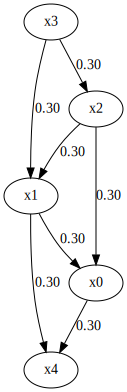

In [3]:
m = np.array([[0.0, 0.3, 0.3, 0.0, 0.0],
              [0.0, 0.0, 0.3, 0.3, 0.0],
              [0.0, 0.0, 0.0, 0.3, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0],
              [0.3, 0.3, 0.0, 0.0, 0.0]])

make_dot(m)

## Causal Discovery
To run causal discovery, we create a `DirectLiNGAM` object by specifying 'kernel' in the `measure` parameter. Then, we call the `fit` method. 

In [4]:
model = lingam.DirectLiNGAM(measure='kernel')
model.fit(X)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [5]:
model.causal_order_

[3, 2, 1, 0, 4]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [6]:
model.adjacency_matrix_

array([[0.   , 0.34 , 0.273, 0.   , 0.   ],
       [0.   , 0.   , 0.304, 0.275, 0.   ],
       [0.   , 0.   , 0.   , 0.261, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.26 , 0.239, 0.   , 0.   , 0.   ]])

We can draw a causal graph by utility funciton.

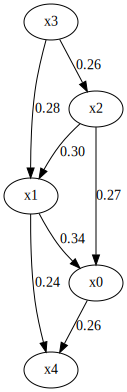

In [7]:
make_dot(model.adjacency_matrix_)